# MC vs signal peak of data

Goal:
- Compare the training variables for the MC to signal component of the LHCb data (using sWeights)
- Compare the MC BDT distribution and the sWeighted BDT distribution

In [1]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, load_saved_root, add_constr_Dst
import plot.histogram as h
from plot.tool import save_file

Welcome to JupyROOT 6.22/02


In [2]:
name_BDT = 'gradient_bkgHighB0M'
name_data = 'common_Dst_constrHEP_sWeights'
var = 'Dst_constr_B0_M'

## Load data with cut on $\Delta M$

Copied from `notebooks/1.BDT/4_launch_BDT_common_bkg_optimised.ipynb`

In [3]:
variables = []

for particle in ['B0', 'Dst', 'tau']:
    variables.append(f"{particle}_PT")


for particle in ['B0', 'tau']:
    variables.append(f"{particle}_ENDVERTEX_CHI2")
    
variables.append('B0_OWNPV_CHI2')

variables.append('B0_FDCHI2_OWNPV')
variables.append('B0_DIRA_OWNPV')
variables.append('Dst_IPCHI2_OWNPV')      
    
for particle in ['tau_pion0', 'tau_pion1', 'tau_pion2']:
    variables.append(f"{particle}_TRACK_CHI2NDOF")

add_variables = ['tau_M', 'B0_M', 'Dst_M', 'D0_M']

In [4]:
df = {}

In [5]:
df['common'] = load_saved_root(name_data, name_folder='common')

/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/common/common_Dst_constrHEP_sWeights.root


In [6]:
df['MC'] = load_data(years, magnets, 'all_MC', vars=variables+add_variables)
df['MC']  = add_constr_Dst(df['MC'])

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09c-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09c-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09c-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09c-ReDecay01.root


In [81]:
df['MC_BDT'] = load_saved_root('MC_'+ name_BDT + '_withB0_OWNPV_CHI2', name_folder='MC')

/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/MC/MC_gradient_bkgHighB0M_withB0_OWNPV_CHI2.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/MC/MC_gradient_bkgHighB0M_withoutB0_OWNPV_CHI2.root


## $_s$Weighted distributions (consistency check)

### $m(3\pi)$

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_Dst_constrHEP_sWeights


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (2e+02 MeV/$c^2$)'>)

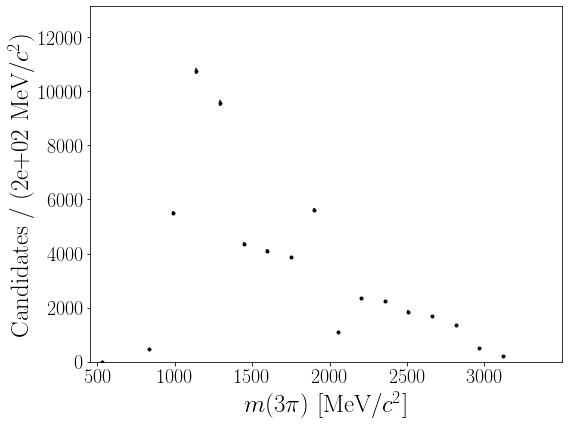

In [87]:
h.plot_hist_particle({name_data:df['common']}, 'tau_M',
          n_bins = 20, mode_hist = False, colors='black', weights=df['common']['sWeight'])

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT_common_Dst_constrHEP_sWeights


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='Candidates / (0.5)'>)

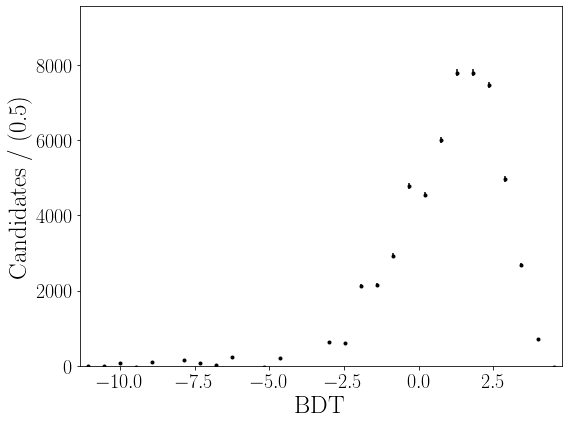

In [83]:
h.plot_hist_particle({name_data:df['common'], }, 'BDT',
          n_bins = 30, mode_hist = False, colors='black', weights=df['common']['sWeight'])

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT_LHCb_data_Signal_peak_of_the_LHCb_data


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='Candidates / (0.5)'>)

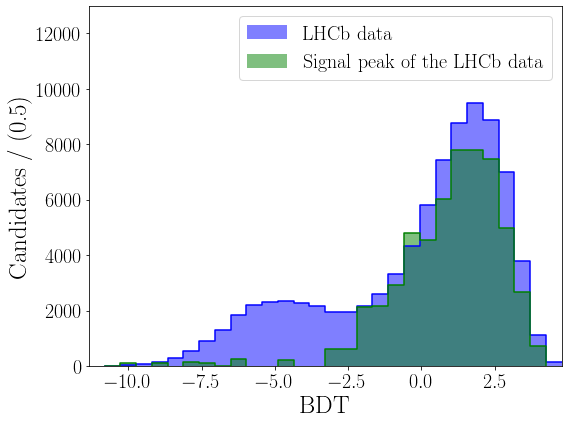

In [88]:
h.plot_hist_particle({'LHCb data':df['common'], 'Signal peak of the LHCb data':df['common']}, 'BDT',
          n_bins = 30, mode_hist = True, colors=['blue', 'green'], weights=[None,df['common']['sWeight']],
                    density=False, label_ncounts=False)

## Compare MC and background data

=====================  B0_PT =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/B0_PT_MC_Signal_peak_of_the_LHCb_data
=====================  Dst_PT =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/Dst_PT_MC_Signal_peak_of_the_LHCb_data
=====================  tau_PT =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/tau_PT_MC_Signal_peak_of_the_LHCb_data
=====================  B0_ENDVERTEX_CHI2 =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/B0_ENDVERTEX_CHI2_MC_Signal_peak_of_the_LHCb_data
=====================  tau_ENDVERTEX_CHI2 =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/tau_ENDVERTEX_CHI2_MC_Signal_peak_of_the_LHCb_data
=====================  B0_OWNPV_CHI2 =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/B0_OWNPV_CHI2_MC_Signal_peak_of_the_LHCb_data
=====================  B0_FDCHI2_OWNPV =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/B0_FDCHI2_OWNPV_MC_Signal_peak_of_the_LHCb_data
=====================  B0_DIRA_OWNPV =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/B0_DIRA_OWNPV_MC_Signal_peak_of_the_LHCb_data
=====================  Dst_IPCHI2_OWNPV =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/Dst_IPCHI2_OWNPV_MC_Signal_peak_of_the_LHCb_data
=====================  tau_pion0_TRACK_CHI2NDOF =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/tau_pion0_TRACK_CHI2NDOF_MC_Signal_peak_of_the_LHCb_data
=====================  tau_pion1_TRACK_CHI2NDOF =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/tau_pion1_TRACK_CHI2NDOF_MC_Signal_peak_of_the_LHCb_data
=====================  tau_pion2_TRACK_CHI2NDOF =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/tau_pion2_TRACK_CHI2NDOF_MC_Signal_peak_of_the_LHCb_data


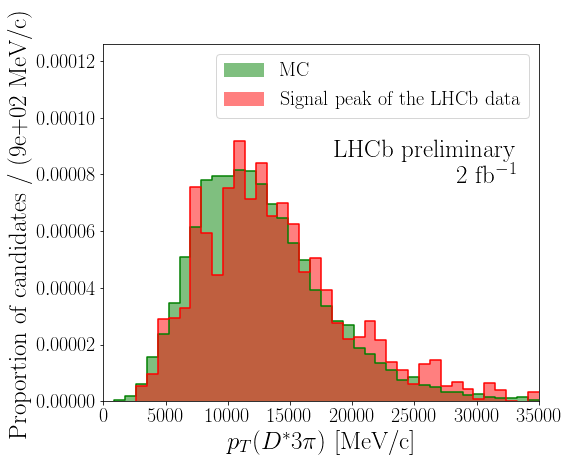

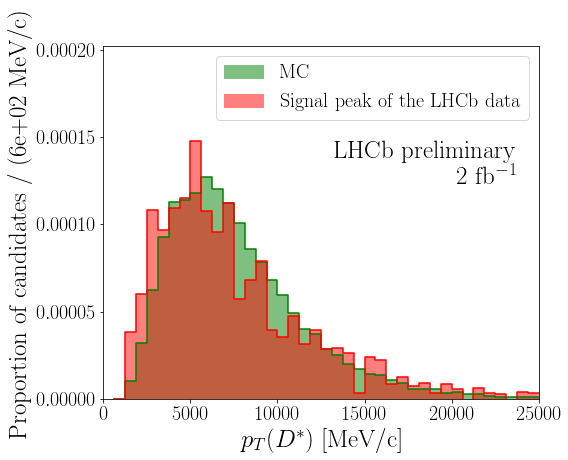

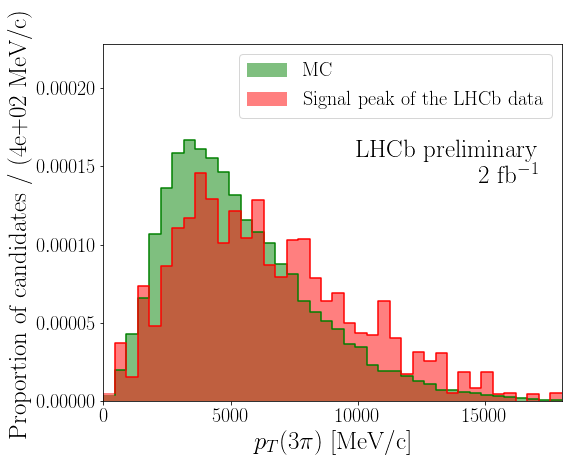

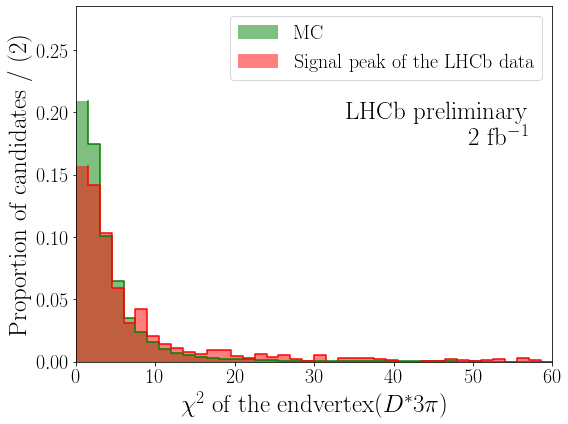

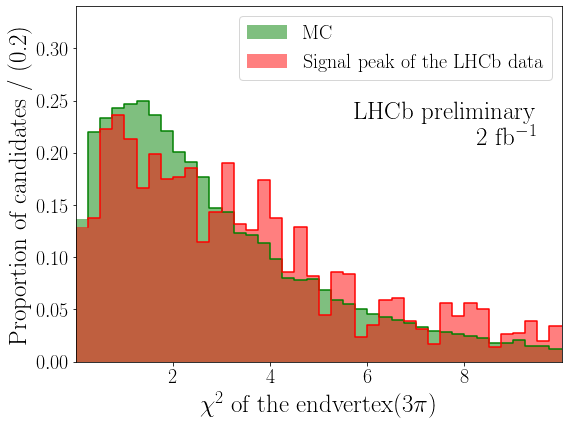

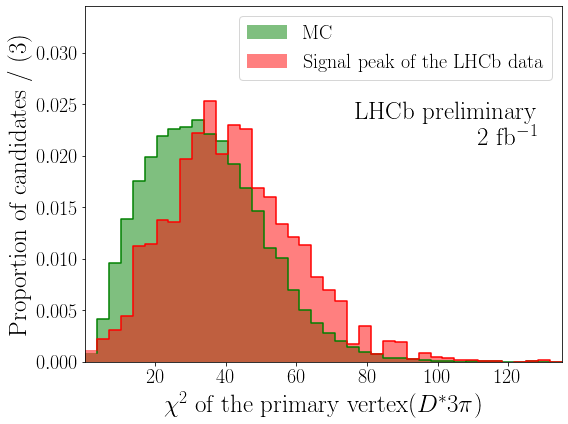

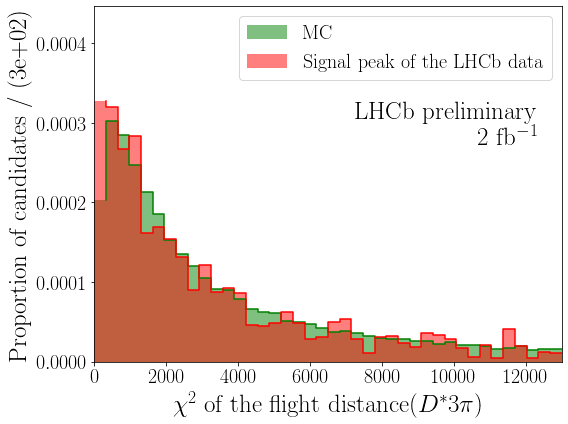

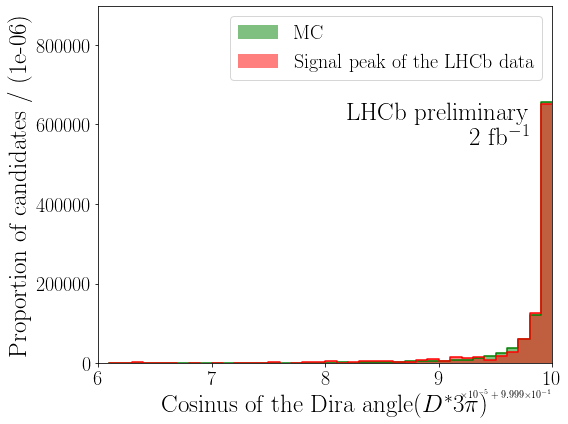

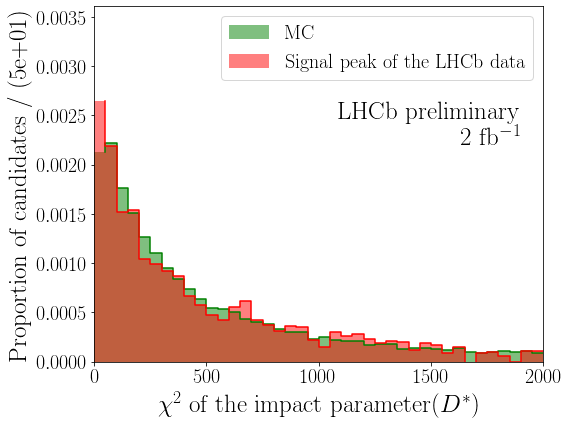

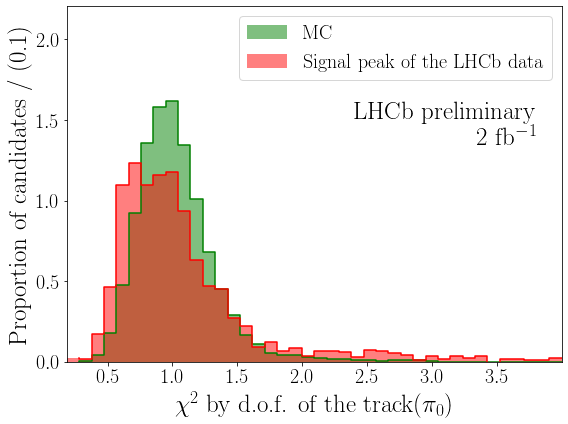

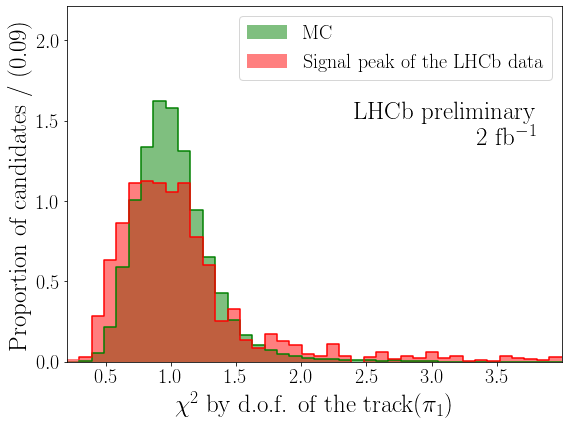

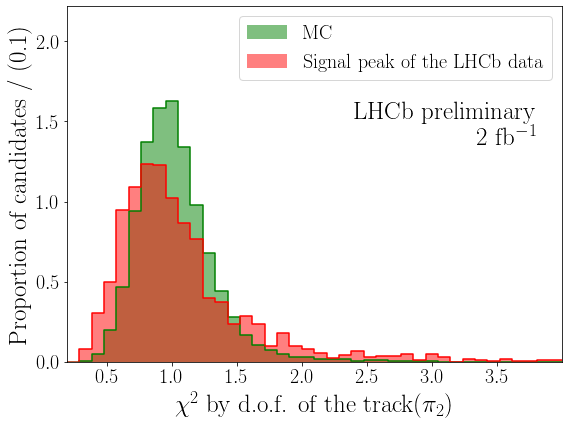

In [90]:
range_dic={
    'B0_PT': [0,35000],
    'Dst_PT':[0,25000],
    'tau_PT':[0,18000],
    'B0_ENDVERTEX_CHI2':[0,60],
    'tau_ENDVERTEX_CHI2':[None,None],
    'B0_OWNPV_CHI2':[None,None],    
    'B0_FDCHI2_OWNPV':[0, 13000], 
    'B0_DIRA_OWNPV':[0.99996, 1], 
    'Dst_IPCHI2_OWNPV':[0, 2000], 
    'tau_pion0_TRACK_CHI2NDOF':[None,None], 
    'tau_pion1_TRACK_CHI2NDOF':[None,None], 
    'tau_pion2_TRACK_CHI2NDOF':[None,None],
}

from matplotlib import rc
rc('text', usetex=True)

for variable in variables:
    print(f"=====================  {variable} =====================")
    
    if variable in range_dic:
        low = range_dic[variable][0]
        high = range_dic[variable][1]
    else:
        low = None
        high = None
        
    h.plot_hist_particle({'MC': df['MC'], 'Signal peak of the LHCb data': df['common']}, variable, alpha=0.5, 
                         name_folder=f'BDT/{name_BDT}/variables/',
                         n_bins=40, mode_hist = True, colors=['g', 'r'], low=low, high=high, 
                         pos_text_LHC=[0.95, 0.73, 'right'], 
                         weights=[None, df['common']['sWeight']],
                         label_ncounts=False)

=====================  B0_DIRA_OWNPV =====================


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_bkgHighB0M/variables/B0_DIRA_OWNPV_Signal_Background


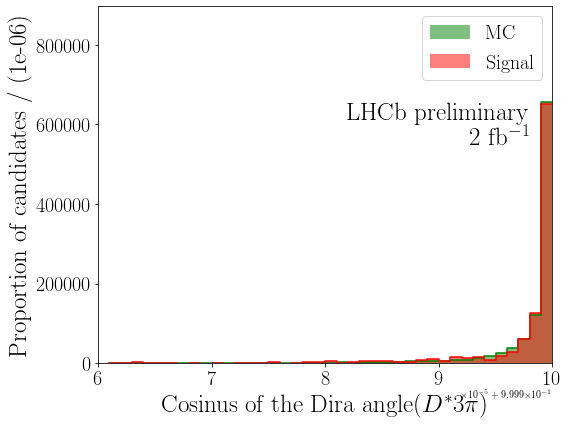

In [91]:
for variable in variables[7:8]:
    print(f"=====================  {variable} =====================")
    
    if variable in range_dic:
        low = range_dic[variable][0]
        high = range_dic[variable][1]
    else:
        low = None
        high = None
        
    h.plot_hist_particle({'MC': df['MC'], 'Signal': df['common']}, variable, alpha=0.5, 
                         name_folder=f'BDT/{name_BDT}/variables/',
                         n_bins=40, mode_hist = True, colors=['g', 'r'], low=low, high=high, 
                         pos_text_LHC=[0.95, 0.73, 'right'], 
                         weights=[None, df['common']['sWeight']],
                         label_ncounts=False, save_fig=False)
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    save_file(fig, f'{variable}_Signal_Background',name_folder=f'BDT/{name_BDT}/variables/')

## BDT distribution

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT_MC_data_Signal_peak_of_the_LHCb_data


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='Proportion of candidates / (0.5)'>)

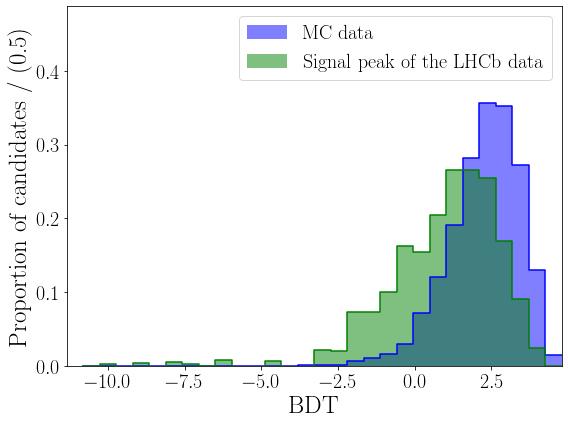

In [92]:
h.plot_hist_particle({'MC data':df['MC_BDT'], 'Signal peak of the LHCb data':df['common']}, 'BDT',
          n_bins = 30, mode_hist = True, colors=['blue', 'green'], weights=[None,df['common']['sWeight']],
                    label_ncounts=False)

## $m(D^*3\pi)$ distribution

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_constr_B0_M_MC_data_Signal_peak_of_the_LHCb_data


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($B^0|m(D_s)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Proportion of candidates / (1e+01 MeV/$c^2$)'>)

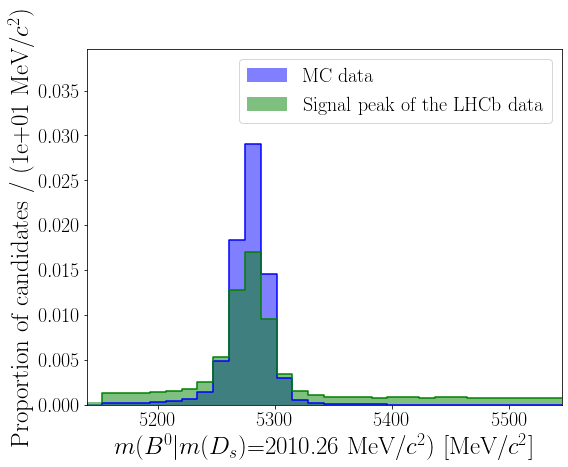

In [98]:
h.plot_hist_particle({'MC data':df['MC'], 'Signal peak of the LHCb data':df['common']}, var,
          n_bins = 30, mode_hist = True, colors=['blue', 'green'],
                    label_ncounts=False)